# **Loading Libary and Dataset**

In [ ]:
!pip install --upgrade gensim -q

In [ ]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 983.7 kB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
!pip install nltk

In [ ]:
# imports the essential libraries
import re
import string
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from textblob import TextBlob
from wordcloud import WordCloud
from collections import Counter
from collections import Counter, defaultdict

In [ ]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
import spacy

In [ ]:
import gensim
gensim.__version__
import gensim.downloader as api
from gensim.models import word2vec
from gensim.models.word2vec import Word2Vec

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.util import ngrams

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# Load the English language model in spaCy
nlp = spacy.load("en_core_web_lg")

In [ ]:
# Load Gensim's pre-trained Word2Vec model
word_vectors = api.load("word2vec-google-news-300")

[==================================================] 100.0% 1662.8/1662.8MB downloaded


# **Read the dataset**

In [ ]:
from google.colab import drive
# Mount your Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read the dataset from the specified path
df = pd.read_csv('/content/drive/MyDrive/ML project/fake_real.csv', sep=',', encoding='utf-8', quotechar='"')


# **Exploratory Data Analysis**

In [ ]:
# Display the first few rows of the DataFrame
df.head()

,title,text,subject,date,type
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True


In [ ]:
# Display the last few rows of the DataFrame
df.tail()

,title,text,subject,date,type
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",Fake
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",Fake
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",Fake
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",Fake
44897,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",Fake


In [ ]:
#check the distribution of Types
df['subject'].value_counts()

subject
politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: count, dtype: int64

In [ ]:
# Get the dimensions of the DataFrame (rows, columns)
print("\nDimensions of the DataFrame:")
df.shape


Dimensions of the DataFrame:


(44898, 5)

In [ ]:
df.columns

Index(['title', 'text', 'subject', 'date', 'type'], dtype='object')

In [ ]:
# Get a concise summary of the DataFrame including column data types and non-null values
print("\nSummary of the DataFrame:")
df.info()


Summary of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   type     44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


**Clean the text data**

In [ ]:
# Check if the 'text' column is not of string data type
if df['text'].dtype != 'object':
    # Convert 'text' column to string
    df['text'] = df['text'].astype(str)
    print("Converted 'text' column to string data type.")
else:
    print("The 'text' column is already of string data type.")

The 'text' column is already of string data type.


In [ ]:
# Check for missing values in each column
print("\nMissing values in each column:")
df.isnull().sum()


Missing values in each column:


title      0
text       0
subject    0
date       0
type       0
dtype: int64

In [ ]:
df['subject'].value_counts()

subject
politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: count, dtype: int64

# **Visualization**

<ipython-input-47-70cf66024574>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='subject', data=df, palette=custom_palette)


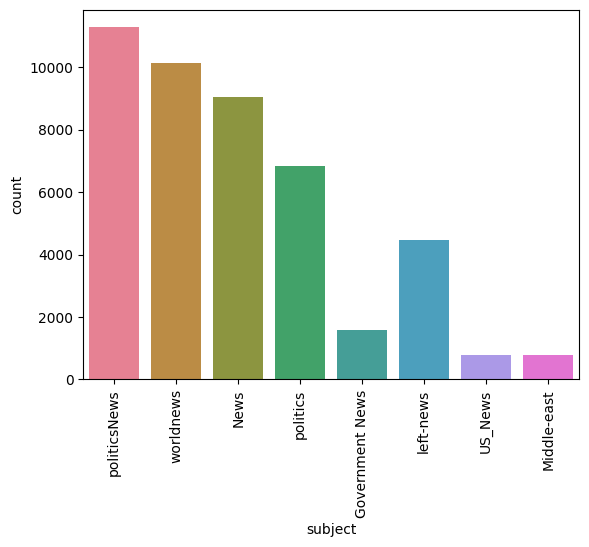

In [ ]:
# Set a custom palette with distinct colors for each subject category
custom_palette = sns.color_palette("husl", len(df['subject'].unique()))

# Create a countplot with Seaborn and specify the custom palette
sns.countplot(x='subject', data=df, palette=custom_palette)

# Rotate x-axis labels vertically
plt.xticks(rotation='vertical')

# Show the plot
plt.show()

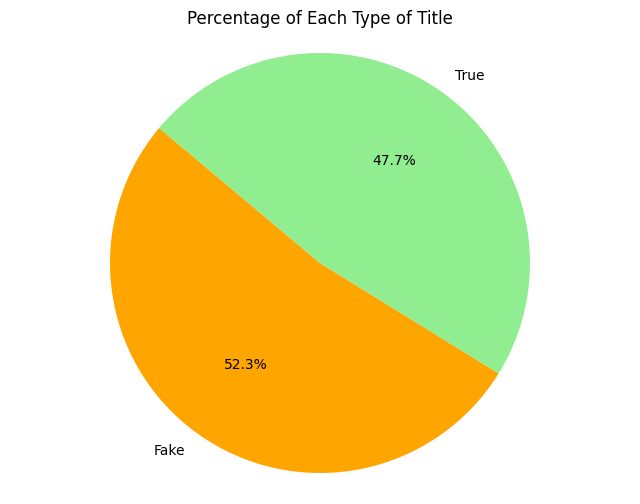

In [ ]:
# Calculate the percentage of each type of title
title_percentage = df['type'].value_counts(normalize=True) * 100

# Plotting
plt.figure(figsize=(8, 6))
# Define colors for each type of title
colors = ['orange','lightgreen']
plt.pie(title_percentage, labels=title_percentage.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Percentage of Each Type of Title')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [ ]:
# Display unique values in the 'type' column
print("\nUnique values in the 'type' column:")
df['type'].unique()


Unique values in the 'type' column:


array(['True', 'Fake'], dtype=object)

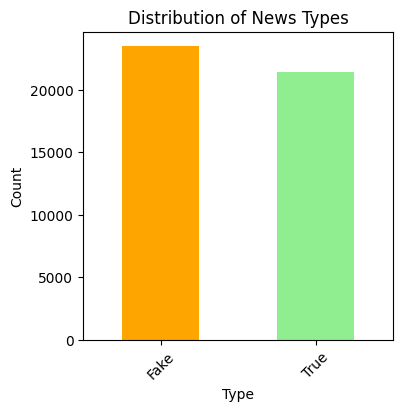

In [ ]:
# Explore unique values in the 'Type' column
type_counts = df['type'].value_counts()

# Define colors for different types
colors = ['orange','lightgreen']

# Plot the counts
plt.figure(figsize=(4, 4))
type_counts.plot(kind='bar', color=colors)
plt.title('Distribution of News Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

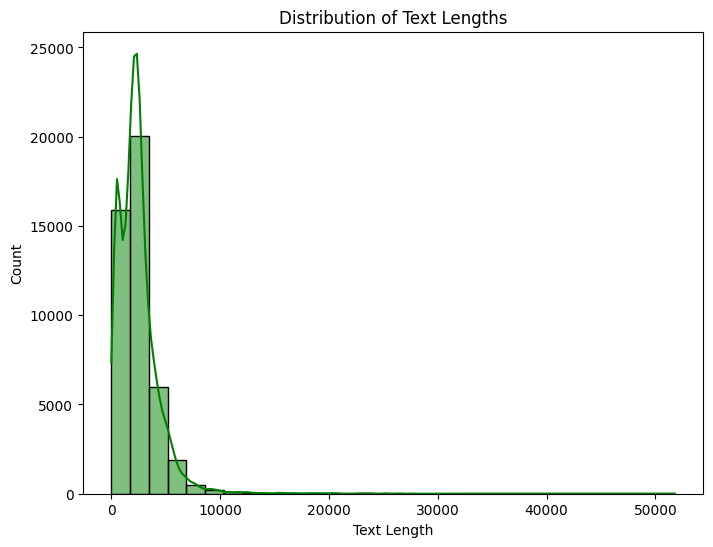

In [ ]:
# Visualize the distribution of content lengths using a histogram
df['text_length'] = df['text'].str.len()
plt.figure(figsize=(8, 6))
sns.histplot(df['text_length'], bins=30, kde=True, color='green')
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()

**Basic Statistics**

In [ ]:
# Calculate basic statistics and plot for each type
types = df['type'].unique()

for t in types:
    type_df = df[df['type'] == t]
    num_documents = len(type_df)
    avg_length = type_df['text'].apply(len).mean()
    max_length = type_df['text'].apply(len).max()
    min_length = type_df['text'].apply(len).min()

    print("\nType:", t)
    print("Number of documents:", num_documents)
    print("Average length of documents:", avg_length)
    print("Maximum length of documents:", max_length)
    print("Minimum length of documents:", min_length)


Type: True
Number of documents: 21417
Average length of documents: 2383.278517065882
Maximum length of documents: 29781
Minimum length of documents: 1

Type: Fake
Number of documents: 23481
Average length of documents: 2547.396235254035
Maximum length of documents: 51794
Minimum length of documents: 1


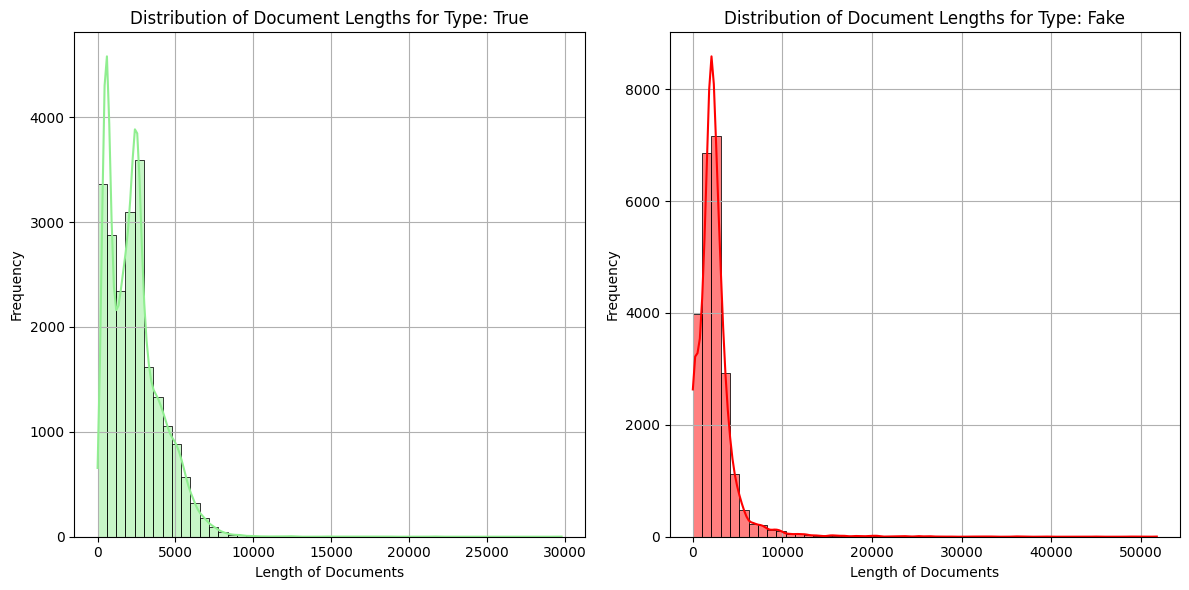

In [ ]:
# Plot distribution of document lengths with different colors
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for i, t in enumerate(types):
    type_df = df[df['type'] == t]
    color = 'red' if t == 'Fake' else 'lightgreen'
    sns.histplot(type_df['text'].apply(len), bins=50, kde=True, color=color, ax=axes[i])
    axes[i].set_title('Distribution of Document Lengths for Type: {}'.format(t))
    axes[i].set_xlabel('Length of Documents')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

**Vocabulary Analysis**


Type: True
Size of Vocabulary: 88939
Number of Rare Words (frequency = 1): 34248

Type: Fake
Size of Vocabulary: 180542
Number of Rare Words (frequency = 1): 78244


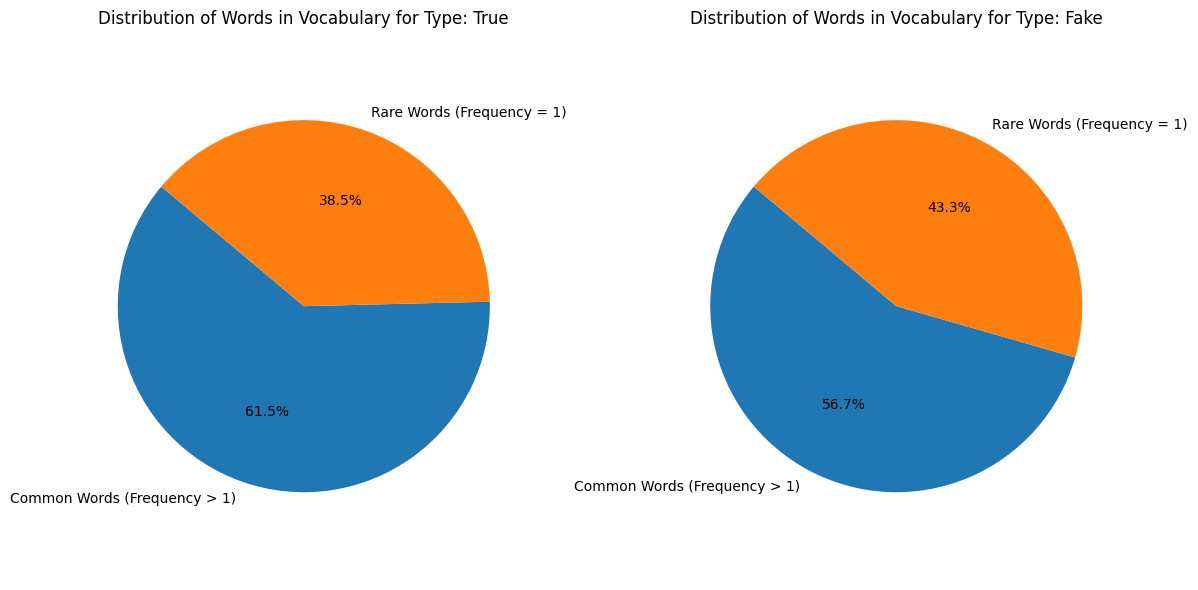

In [ ]:
# Initialize an empty defaultdict to store word frequencies for each type
word_freq_by_type = defaultdict(lambda: defaultdict(int))

# Initialize variables to store vocabulary size and rare word count for each type
vocabulary_size_by_type = defaultdict(int)
num_rare_words_by_type = defaultdict(int)

# Set the batch size for updating word frequencies
batch_size = 1000  # Adjust as needed

# Iterate over each document to update word frequencies incrementally
for i, (text, type) in enumerate(zip(df['text'], df['type']), start=1):
    # Tokenize the text
    tokens = word_tokenize(text.lower())

    for token in tokens:
        word_freq_by_type[type][token] += 1  # Update word frequencies for each type

    # Update vocabulary size and count rare words after processing a batch of documents
    if i % batch_size == 0 or i == len(df):
        for t in word_freq_by_type.keys():
            vocabulary_size_by_type[t] = len(word_freq_by_type[t])
            num_rare_words_by_type[t] = sum(1 for freq in word_freq_by_type[t].values() if freq == 1)

# Output vocabulary statistics and plot the distribution of rare words versus common words for each type
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for i, t in enumerate(vocabulary_size_by_type.keys()):
    print("\nType:", t)
    print("Size of Vocabulary:", vocabulary_size_by_type[t])
    print("Number of Rare Words (frequency = 1):", num_rare_words_by_type[t])

    # Plot the distribution of rare words versus common words for each type
    labels = ['Common Words (Frequency > 1)', 'Rare Words (Frequency = 1)']
    sizes = [vocabulary_size_by_type[t] - num_rare_words_by_type[t], num_rare_words_by_type[t]]

    ax = axes[i]
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    ax.set_title('Distribution of Words in Vocabulary for Type: {}'.format(t))
    ax.axis('equal')

plt.tight_layout()
plt.show()

# **Data Preprocessing:**


In [ ]:
#Add the new column which gives a unique number to each of these labels

df['type_num'] = df['type'].map({'Fake' : 0, 'True': 1})

#check the results with top 5 rows
df.head(5)

,title,text,subject,date,type,type_num
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True,1


In [ ]:
# Remove unwanted column ('Unnamed: 0','Title', 'Type')
df=df.drop(['title','subject','date','type'],axis=1)

In [ ]:
df.head()

,text,type_num
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1


**processing the text data using spaCy**


In [ ]:
def process_Content(text):
    # Function to remove punctuation marks from text
    def remove_punctuation(text):
        punctuation_pattern = r'[^\w\s]'
        cleaned_text = re.sub(punctuation_pattern, '', text)
        return cleaned_text

    # Function to remove special characters and numbers from text
    def remove_special_characters_and_numbers(text):
        special_characters_and_numbers_pattern = r'[^a-zA-Z\s]'
        cleaned_text = re.sub(special_characters_and_numbers_pattern, '', text)
        return cleaned_text

    # Function to remove digits from text
    def remove_digits(text):
        digit_pattern = r'\d+'
        cleaned_text = re.sub(digit_pattern, '', text)
        return cleaned_text

    # Function to convert text to lowercase
    def convert_to_lowercase(text):
        return text.lower()

    # Function to tokenize the text
    def tokenize_text(text):
        return word_tokenize(text)

    # Function to remove stopwords from tokens
    def remove_stopwords(tokens):
        stop_words = set(stopwords.words('english'))
        return [token for token in tokens if token not in stop_words]

    # Function to lemmatize tokens using spaCy
    def lemmatize_tokens(tokens):
        return [token.lemma_ for token in nlp(" ".join(tokens))]

    # Function to join tokens back into a single string
    def join_tokens(tokens):
        return ' '.join(tokens)

    cleaned_text = remove_punctuation(text)
    cleaned_text = remove_special_characters_and_numbers(cleaned_text)
    cleaned_text = remove_digits(cleaned_text)  # Remove digits
    cleaned_text = convert_to_lowercase(cleaned_text)
    tokens = tokenize_text(cleaned_text)
    tokens = remove_stopwords(tokens)
    tokens = lemmatize_tokens(tokens)
    processed_Content = join_tokens(tokens)

    return processed_Content

# Apply the process_Content function to the 'Content' column
df['Processed_Content'] = df['Content'].apply(process_Content)

# Display the DataFrame after text preprocessin
df.head()

KeyError: 'Content'

In [ ]:
# Define a function for vectorization
def vectorize_text(text):
    # Tokenize the text
    tokens = nlp(text)

    # Vectorize the tokens
    word_vectors = np.array([token.vector for token in tokens])

    # Take the mean of word vectors to get the sentence vector
    if word_vectors.size == 0:
        sentence_vector = np.zeros(300)  # Return zero vector if no word vectors found
    else:
        sentence_vector = np.mean(word_vectors, axis=0)

    return sentence_vector

# Apply vectorization to each processed text in the "Processed_Content" column
df["Vectorized_Content"] = df["Processed_Content"].apply(vectorize_text)

# Display the vectorized text
df.head()